**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

#Finding Patterns in The Housing Market

Assume you own a real estate corporation. You want to service California's housing market. You decide to perform cluster analysis on available data to better understand the market.



## Load the data

We are using [this dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

In [ ]:
import sklearn
import pandas as pd

data = sklearn.datasets.fetch_california_housing(as_frame=True)
# Add data and target to one dataframe
df = data.frame
target = data.target
features = data.data
df = pd.concat([features, target], axis=1)

# Take a random subset. (How do you know X% is enough?)
df = df.sample(frac=0.15, random_state=42)

display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
19053,3.2937,33.0,5.317647,1.067647,824.0,2.423529,38.16,-121.69,0.96400
9444,2.6620,13.0,7.107884,1.410788,643.0,2.668050,37.57,-119.82,0.92400
20266,3.0870,46.0,4.396588,1.031983,1522.0,3.245203,34.21,-119.18,2.13900
13522,6.1426,17.0,6.304965,0.929078,439.0,3.113475,34.23,-117.41,1.55000


## Data Preprocessing and Understanding

Let's check if there are any null values and fix that.

In [ ]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Let's understand the data distribution. Any issues you can spot?

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,3.848891,28.959302,5.389907,1.092290,1421.188307,2.971326,35.567558,-119.502067,2.069368
std,1.924476,12.452986,2.096757,0.358895,1121.627687,1.974372,2.130349,1.991002,1.144959
min,0.499900,1.000000,0.846154,0.500000,8.000000,1.263566,32.540000,-124.190000,0.149990
25%,2.550175,19.000000,4.396633,1.004929,781.750000,2.428436,33.930000,-121.700000,1.215750
50%,3.504950,29.000000,5.189232,1.046842,1153.000000,2.820594,34.210000,-118.460000,1.813000
75%,4.656375,37.000000,6.012385,1.095558,1714.250000,3.289374,37.700000,-118.000000,2.656000
max,15.000100,52.000000,41.333333,8.476190,12427.000000,83.171429,41.810000,-114.580000,5.000010


How do the ranges of values for different attributes differ? Let's keep that in mind.

Let's look at the relationship between different attributes.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

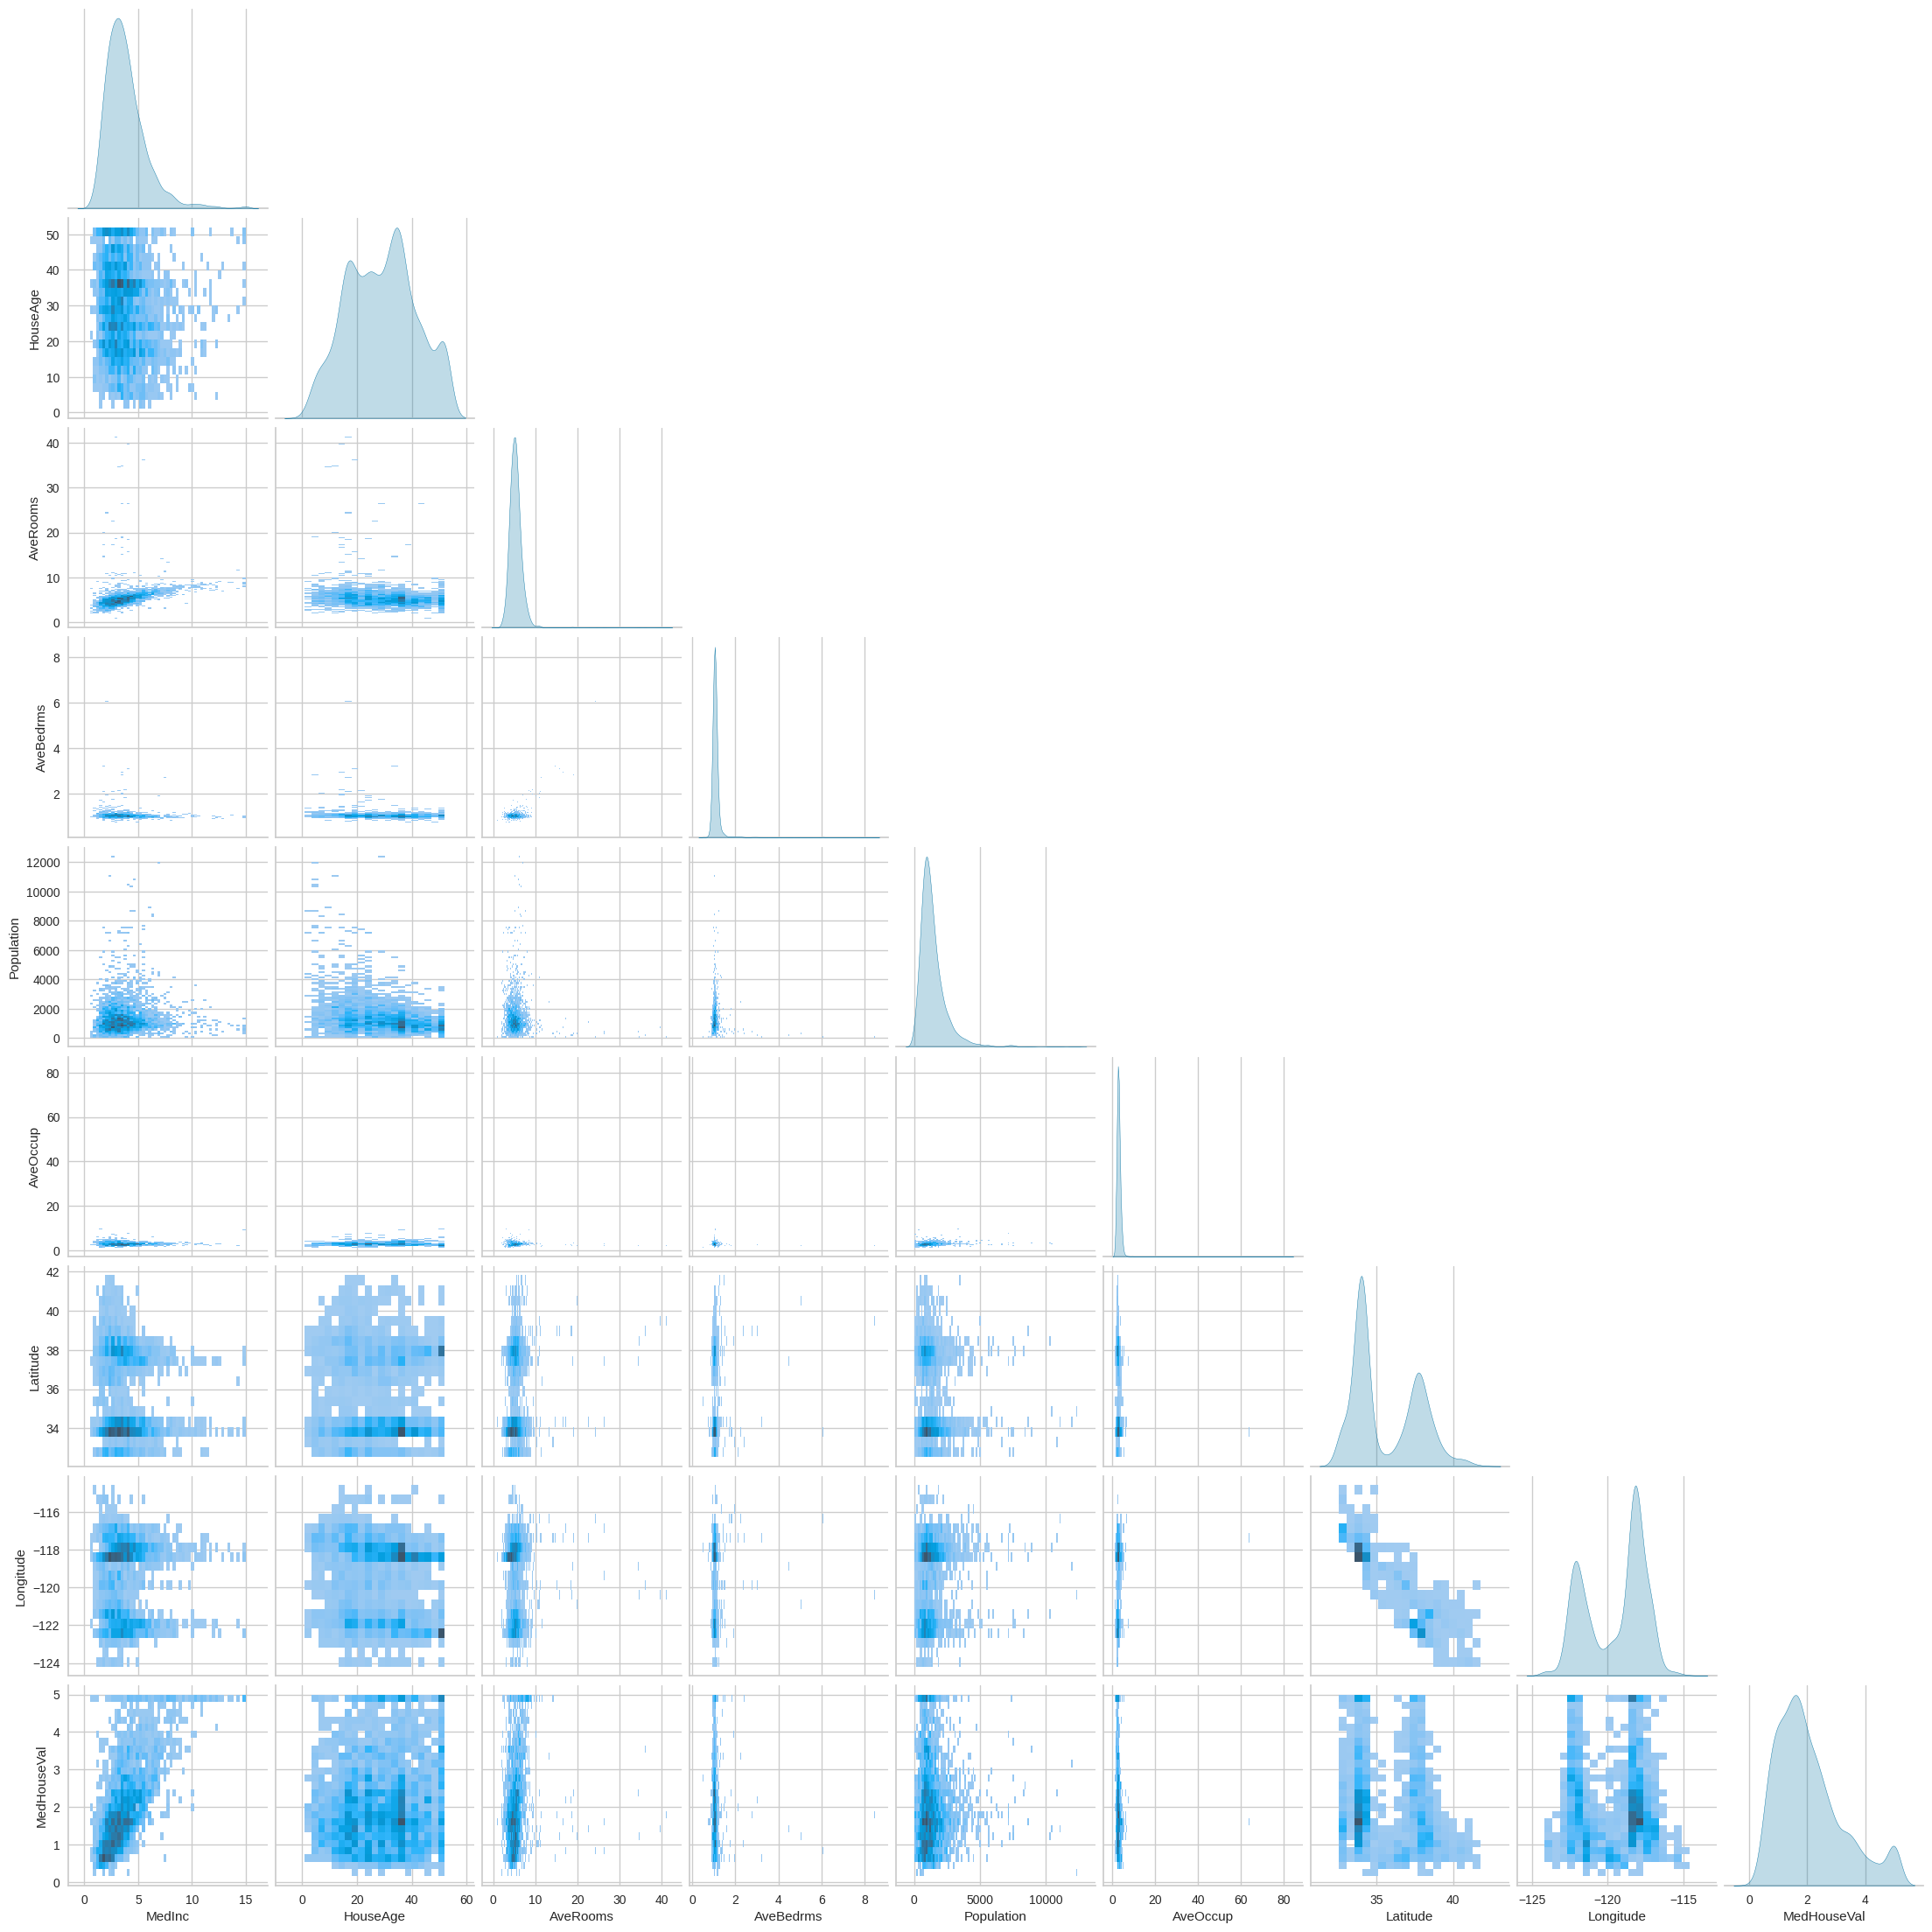

In [ ]:
sns.pairplot(df, kind="hist", diag_kind="kde", corner=True)

**Question:** Why are some histograms very skewed? What can we do about that?

Let's look at how the different attributes correlate.

<Axes: >

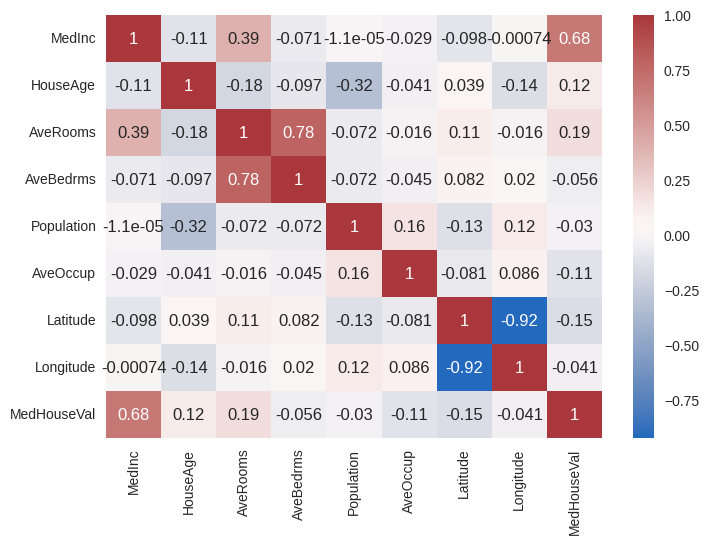

In [ ]:
corr = df.corr( numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag")

We can see that some features are quite highly correlated (This is called *multicollinearity*). We may want to think about removing redundancies... But, that's an exercise for another time... (dimensionality reduction)

**Question:** How come latitude and longitude are so highly negatively correlated?

Let's plot the datapoints (i.e., the blocks/districts) geographically

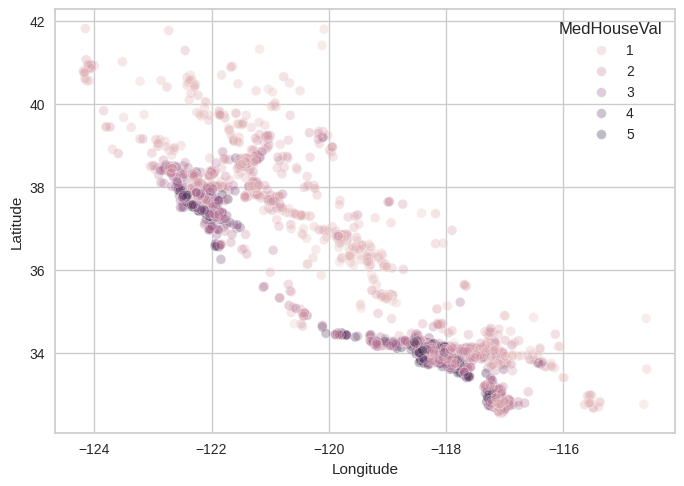

In [ ]:

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal', alpha=0.3)
plt.show()

##Hierarchical Clustering

Let's take a look at the dendrogram

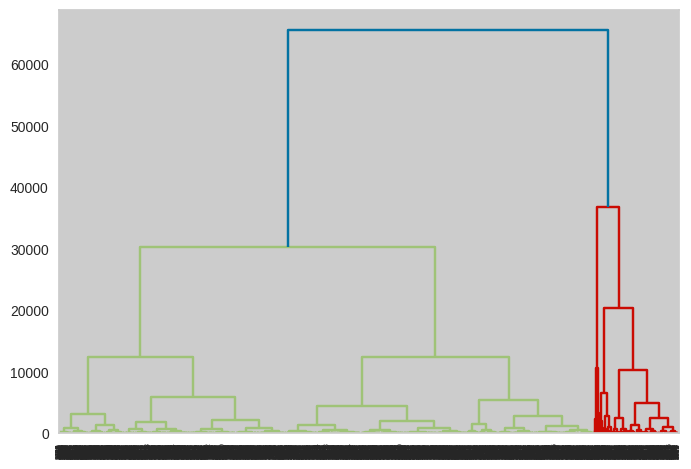

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(df, 'ward') #You may try different methods and distance metrics.

_ = dendrogram(Z,)

For starters, let's choose K=3

In [ ]:
n_clusters = 3

df['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster_labels
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,1
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,1
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,1
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,1
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,1
...,...,...,...,...,...,...,...,...,...,...
19053,3.2937,33.0,5.317647,1.067647,824.0,2.423529,38.16,-121.69,0.96400,1
9444,2.6620,13.0,7.107884,1.410788,643.0,2.668050,37.57,-119.82,0.92400,1
20266,3.0870,46.0,4.396588,1.031983,1522.0,3.245203,34.21,-119.18,2.13900,1
13522,6.1426,17.0,6.304965,0.929078,439.0,3.113475,34.23,-117.41,1.55000,1


In [ ]:
df['cluster_labels'].value_counts()

,count
cluster_labels,
1,2679
3,391
2,26


Plot the clusters geographically

<Axes: xlabel='Longitude', ylabel='Latitude'>

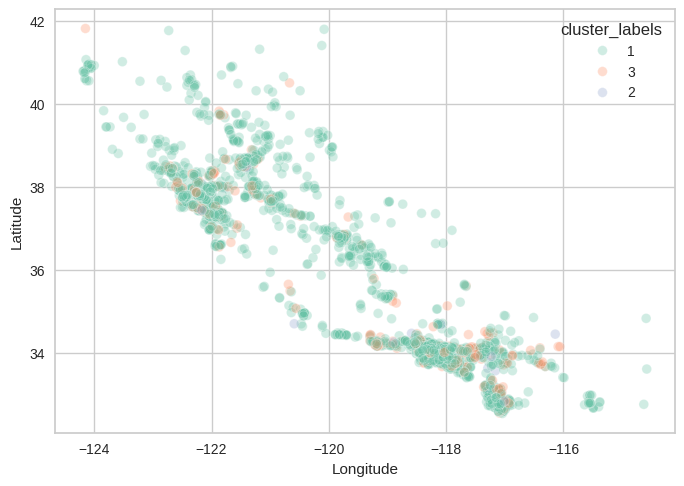

In [ ]:
sns.scatterplot(df, x = 'Longitude', y = 'Latitude', hue='cluster_labels', palette="Set2", alpha=0.3)

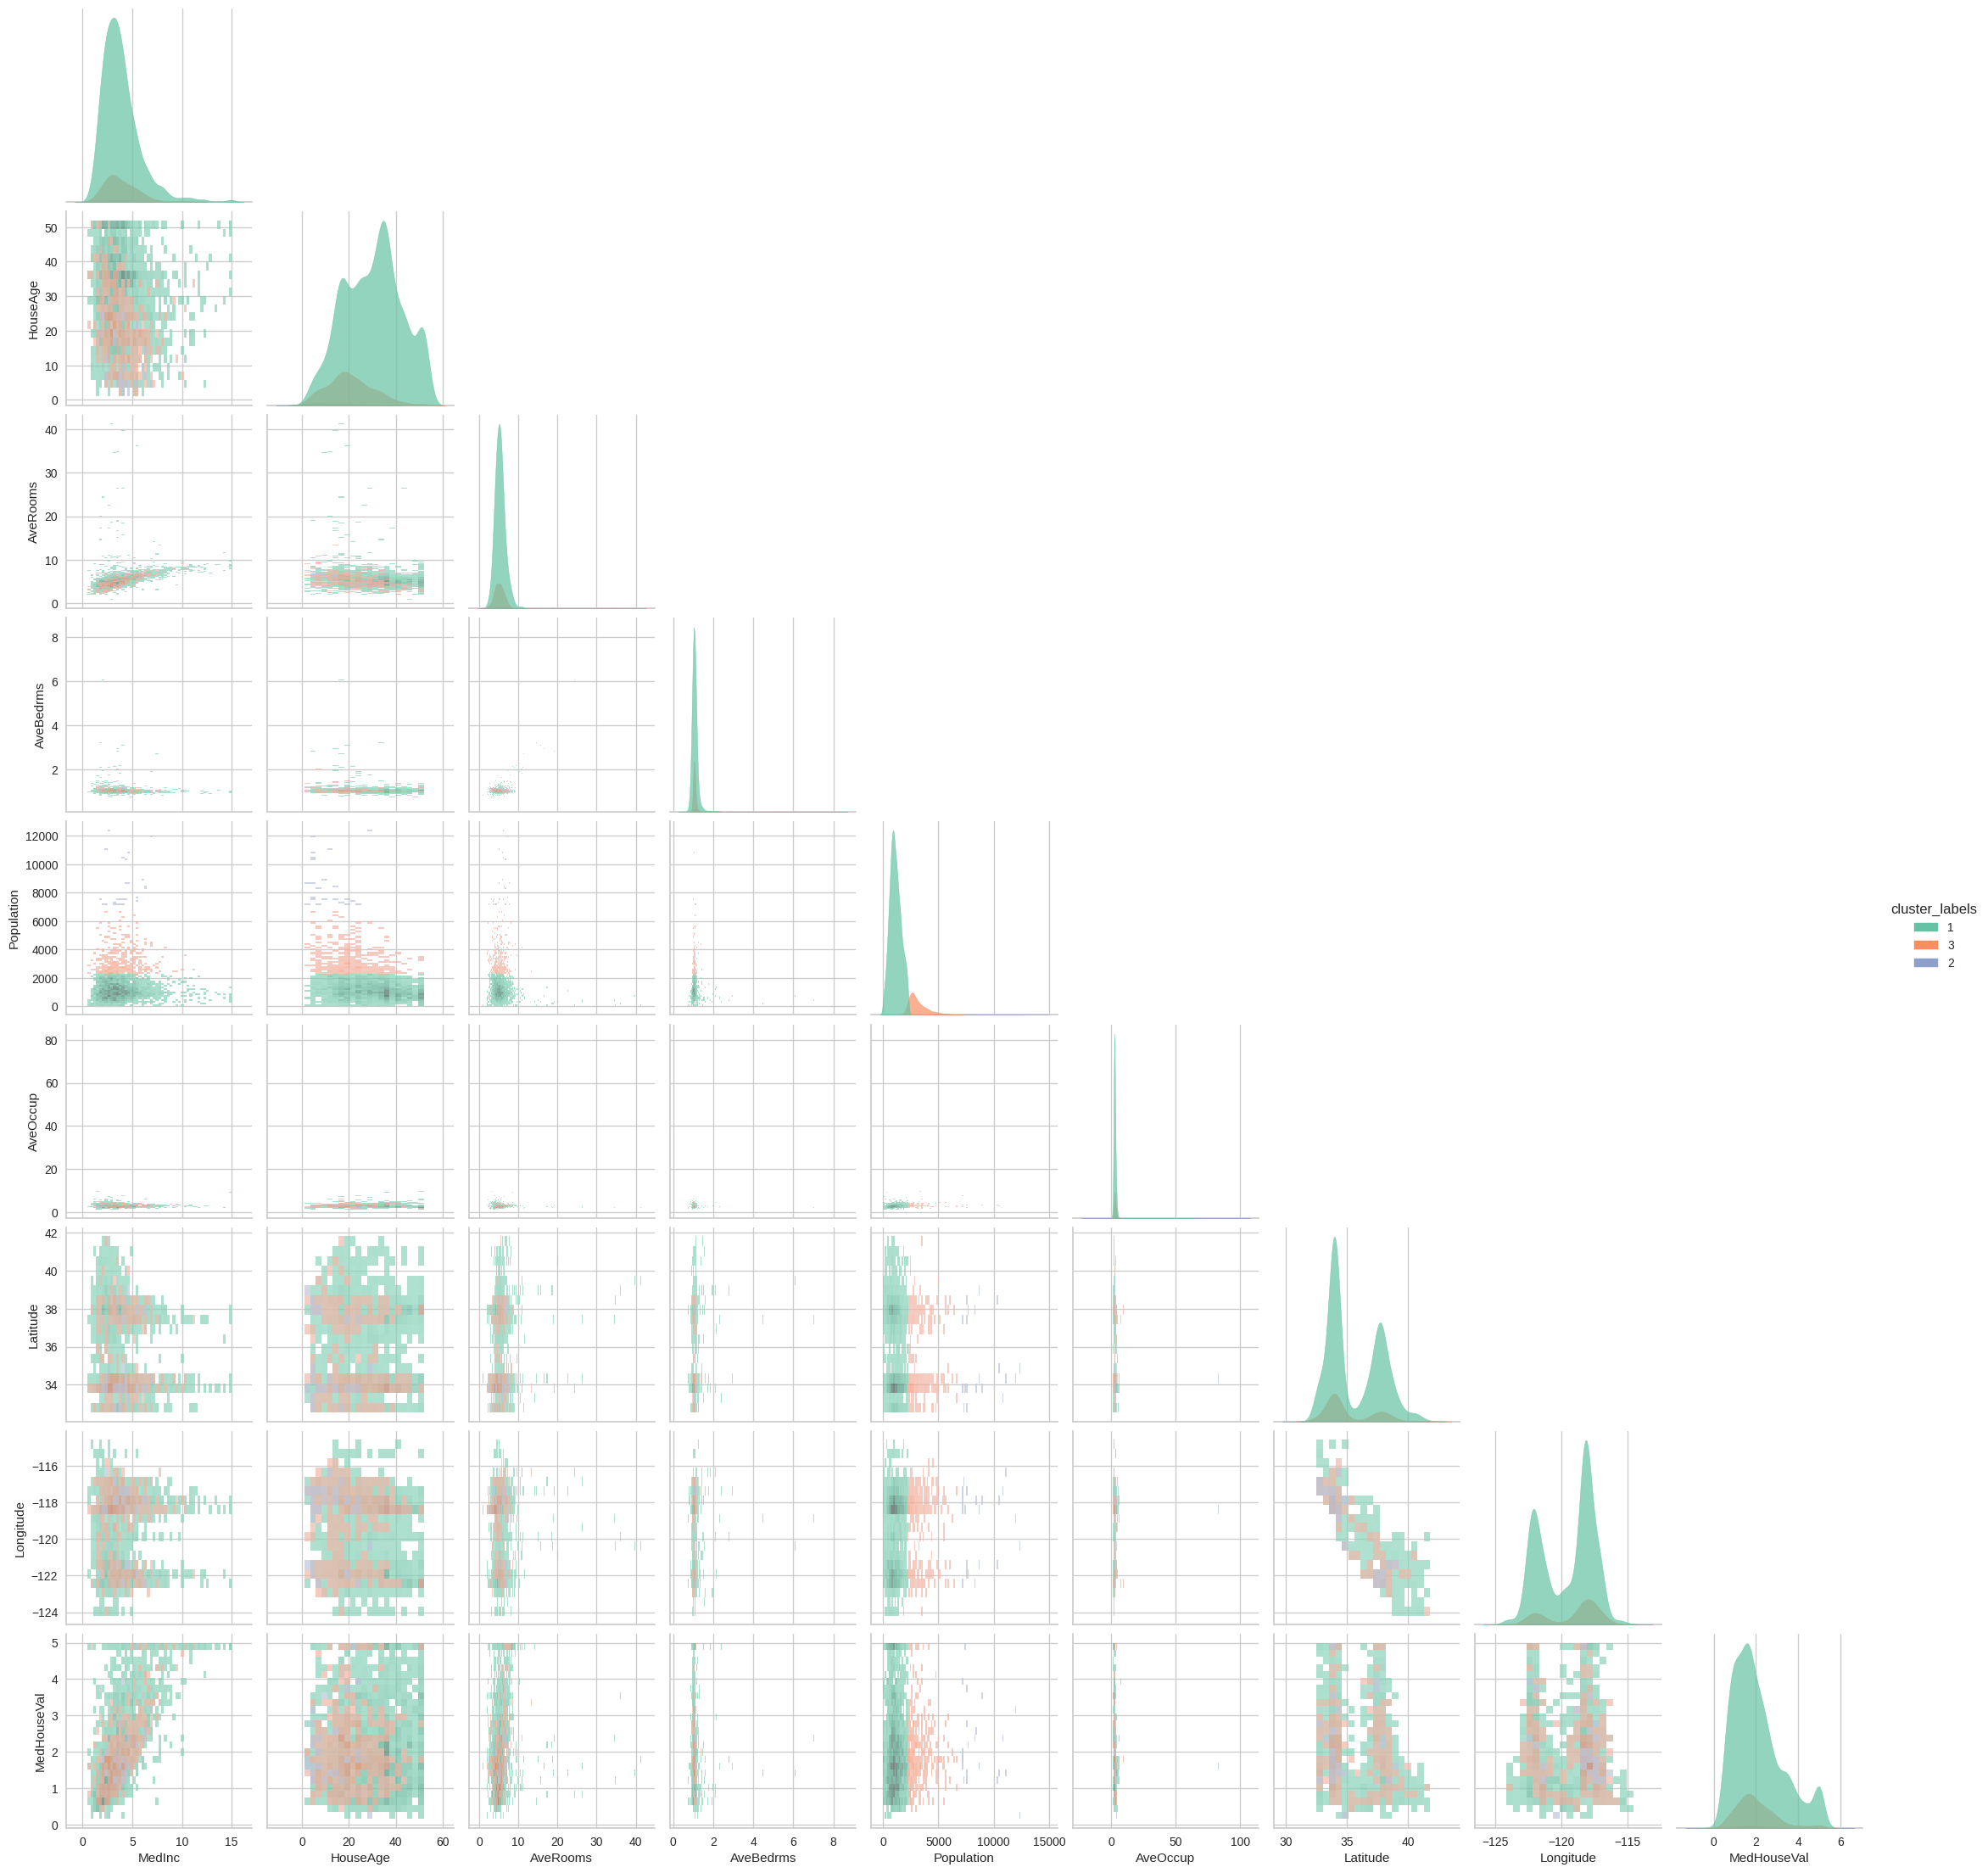

In [ ]:
sns.pairplot(df, kind="hist", diag_kind="kde", corner=True, hue="cluster_labels", palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

Seems like the clustering is heavily based on the block's population. **Why?** **How do we fix that?**

## Feature Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Drop cluster label and Normalize df
df_normalized = df.drop('cluster_labels', axis=1)
df_normalized = pd.DataFrame(sc.fit_transform(df_normalized), columns=df_normalized.columns)

df_normalized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-1.126562,-0.317991,-0.571311,-0.195092,-0.026027,0.459011,0.231193,0.247185,-1.390989
1,-0.684760,0.083584,-0.167201,0.282031,0.128238,-0.147681,-0.200731,0.021132,-1.407586
2,-0.191663,1.850514,-0.673889,0.260807,-0.099147,-0.816084,1.048092,-1.475844,2.560018
3,0.981573,-0.960511,0.369072,-0.200894,0.253076,0.239669,-0.604486,0.392864,0.101882
4,-0.064387,0.404844,0.049171,-0.179059,-0.319398,-0.247045,0.494103,-1.219650,0.620762
...,...,...,...,...,...,...,...,...,...
3091,-0.288536,0.324529,-0.034468,-0.068675,-0.532516,-0.277498,1.217106,-1.099088,-0.965577
3092,-0.616835,-1.281771,0.819482,0.887586,-0.693915,-0.153631,0.940111,-0.159711,-1.000519
3093,-0.395959,1.368624,-0.473817,-0.168063,0.089894,0.138738,-0.637350,0.161788,0.060826
3094,1.192054,-0.960511,0.436486,-0.454837,-0.875823,0.072009,-0.627960,1.050931,-0.453686


In [ ]:
df_normalized.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,3.096000e+03,3.096000e+03,3.096000e+03,3.096000e+03,3.096000e+03,3.096000e+03,3.096000e+03,3.096000e+03,3.096000e+03
mean,-2.983545e-17,1.101617e-16,-5.129403e-16,-2.903219e-16,-1.044241e-16,-1.870453e-16,1.056863e-15,5.461609e-15,1.893404e-16
std,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00
min,-1.740491e+00,-2.245551e+00,-2.167389e+00,-1.650585e+00,-1.260148e+00,-8.651033e-01,-1.421385e+00,-2.354940e+00,-1.676643e+00
25%,-6.749506e-01,-7.998813e-01,-4.737956e-01,-2.434564e-01,-5.701906e-01,-2.750126e-01,-7.688048e-01,-1.104112e+00,-7.456650e-01
50%,-1.787484e-01,3.268634e-03,-9.572282e-02,-1.266552e-01,-2.391450e-01,-7.635649e-02,-6.373497e-01,5.234730e-01,-2.239464e-01
75%,4.196540e-01,6.457886e-01,2.969244e-01,9.106109e-03,2.613247e-01,1.611142e-01,1.001144e+00,7.545498e-01,5.124434e-01
max,5.795349e+00,1.850514e+00,1.714516e+01,2.057734e+01,9.813942e+00,4.062713e+01,2.930717e+00,2.472556e+00,2.560018e+00


In [ ]:
Z = linkage(df_normalized, 'ward') #Try different ones.
df_normalized['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)

<Axes: xlabel='Longitude', ylabel='Latitude'>

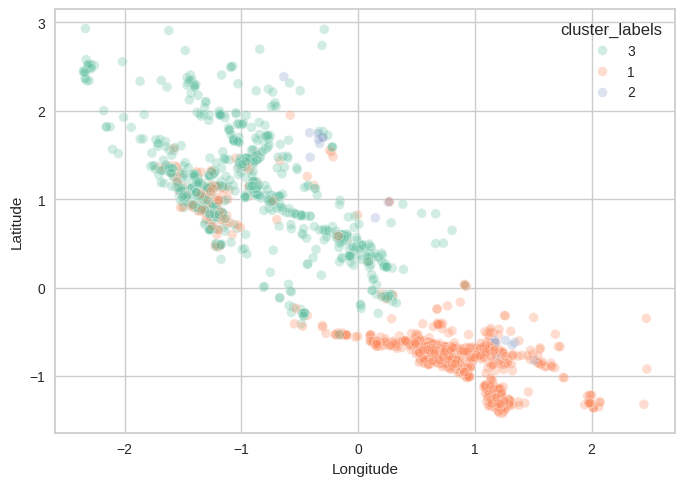

In [ ]:
sns.scatterplot(df_normalized, x = 'Longitude', y = 'Latitude', hue='cluster_labels', palette="Set2", alpha=0.3)


In [ ]:
df_normalized['cluster_labels'].value_counts()

,count
cluster_labels,
1,1918
3,1158
2,20


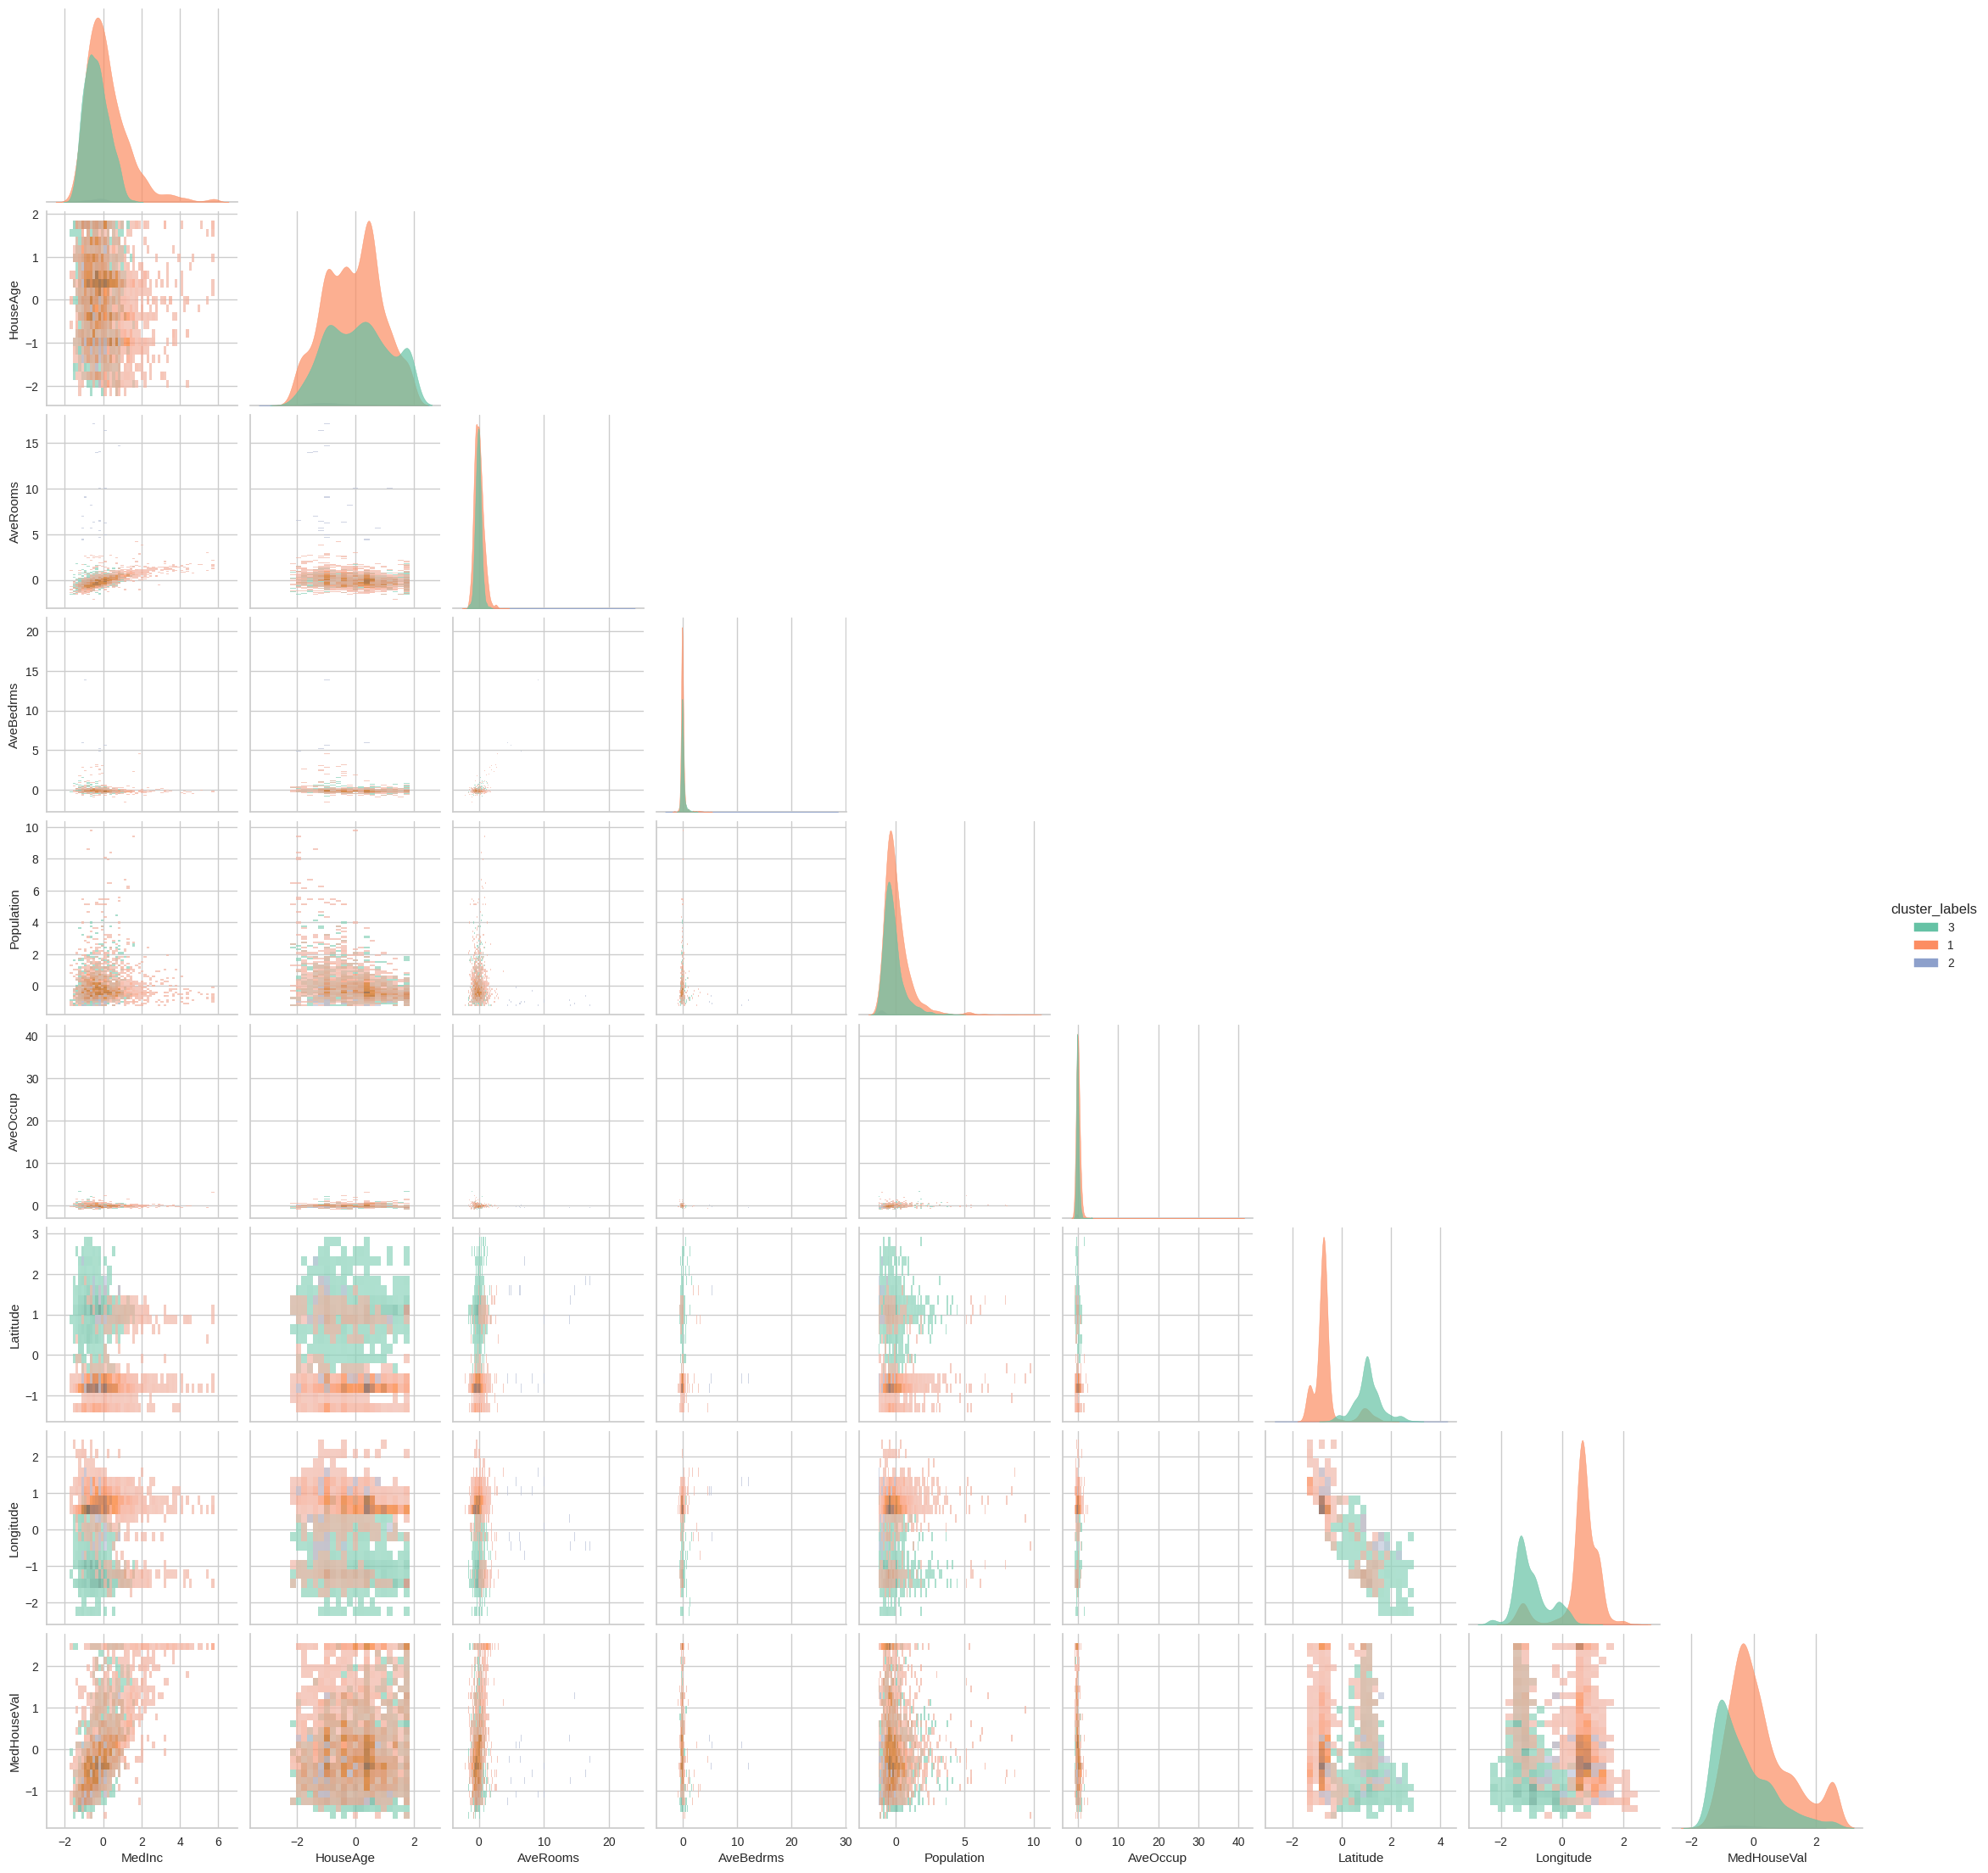

In [ ]:
sns.pairplot(df_normalized, hue="cluster_labels", kind="hist", diag_kind="kde" , corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_normalized, x='Longitude', y='Latitude', z='Population', color='cluster_labels',
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

**Interprtation?**

## K-means

In [ ]:
#Normalize first

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_normalized = df.drop('cluster_labels', axis=1)
df_normalized = pd.DataFrame(sc.fit_transform(df_normalized), columns=df_normalized.columns)

df_normalized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-1.126562,-0.317991,-0.571311,-0.195092,-0.026027,0.459011,0.231193,0.247185,-1.390989
1,-0.684760,0.083584,-0.167201,0.282031,0.128238,-0.147681,-0.200731,0.021132,-1.407586
2,-0.191663,1.850514,-0.673889,0.260807,-0.099147,-0.816084,1.048092,-1.475844,2.560018
3,0.981573,-0.960511,0.369072,-0.200894,0.253076,0.239669,-0.604486,0.392864,0.101882
4,-0.064387,0.404844,0.049171,-0.179059,-0.319398,-0.247045,0.494103,-1.219650,0.620762
...,...,...,...,...,...,...,...,...,...
3091,-0.288536,0.324529,-0.034468,-0.068675,-0.532516,-0.277498,1.217106,-1.099088,-0.965577
3092,-0.616835,-1.281771,0.819482,0.887586,-0.693915,-0.153631,0.940111,-0.159711,-1.000519
3093,-0.395959,1.368624,-0.473817,-0.168063,0.089894,0.138738,-0.637350,0.161788,0.060826
3094,1.192054,-0.960511,0.436486,-0.454837,-0.875823,0.072009,-0.627960,1.050931,-0.453686


Let's investigate the optimal number of clusters this time.

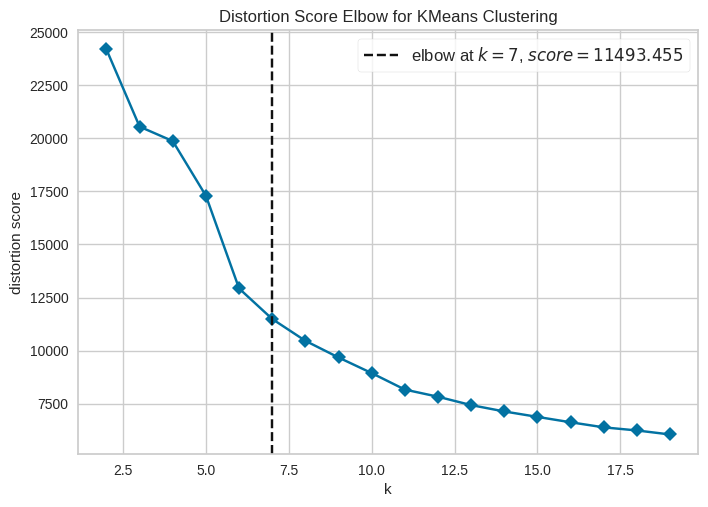

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 20), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

We can also plot the *Silhuette plot*

In [ ]:
n_clusters_kmeans = 6

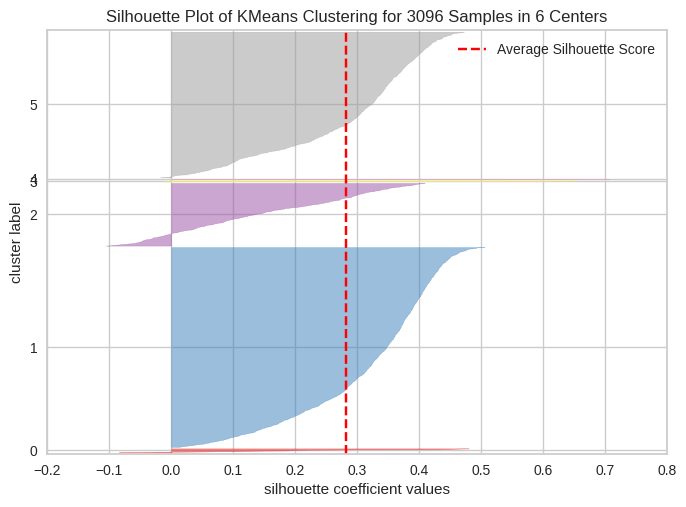

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3096 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Seems like there are several good candidates.

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans model with n_clusters and random_state=42
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42) # Trye different number of clusters

# Fit the model and predict cluster labels, excluding the existing 'cluster_labels' column
df_normalized['cluster_labels'] = kmeans.fit_predict(df_normalized).astype(str)

# Display the value counts of the new cluster labels
print(df_normalized['cluster_labels'].value_counts())


cluster_labels
1    1495
5    1090
2     469
0      31
3       9
4       2
Name: count, dtype: int64


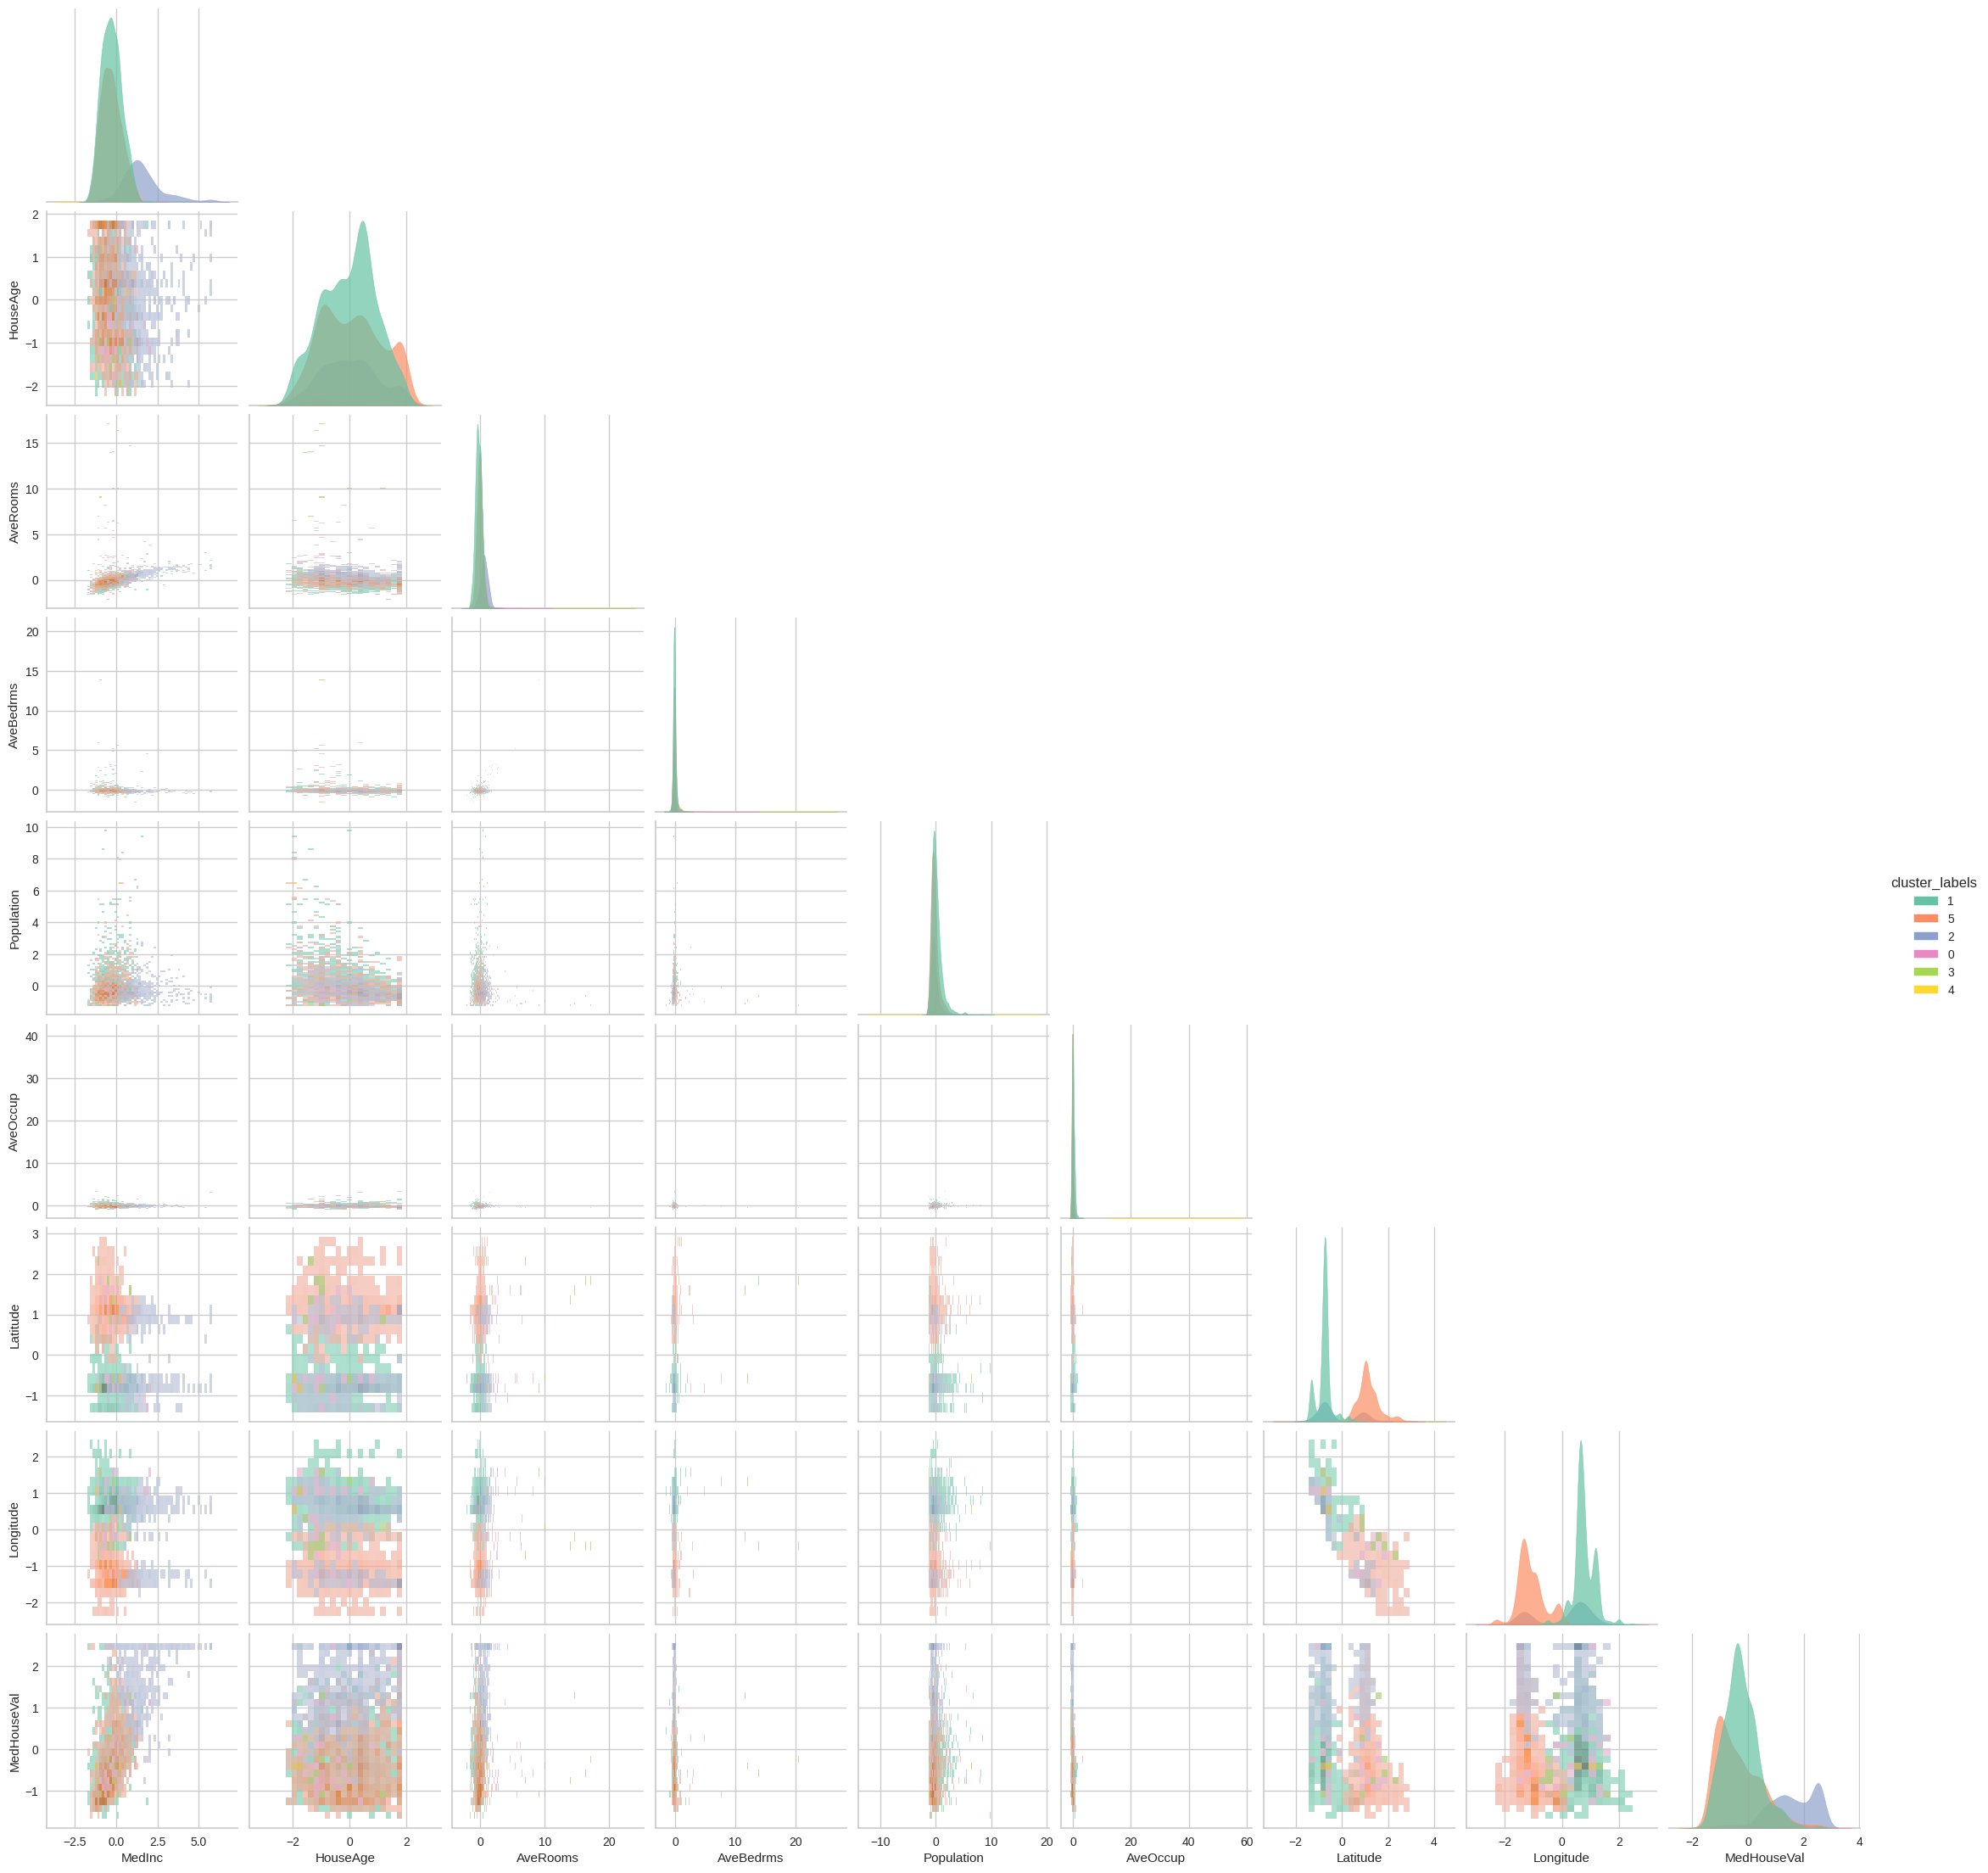

In [ ]:
sns.pairplot(df_normalized, hue="cluster_labels", kind="hist", diag_kind="kde", corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

/tmp/ipython-input-4198707763.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='cluster_labels', ylabel='Longitude'>

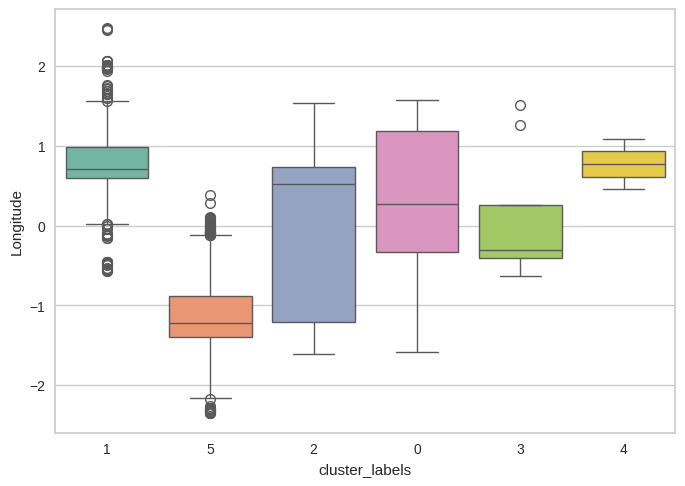

In [ ]:
# Show boxplots of all features per cluster
sns.boxplot(data=df_normalized, x='cluster_labels', y="Longitude", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="Latitude", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="Population", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="AveOccup", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="HouseAge", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="MedInc", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="MedHouseVal", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="AveBedrms", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="AveRooms", palette="Set2")

In [ ]:
pd.DataFrame(sc.inverse_transform(df_normalized.groupby("cluster_labels").median(numeric_only=True)), columns = df_normalized.columns[:-1])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.36720,16.0,11.098131,2.324786,717.0,2.503268,36.85,-118.97,1.3750
1,3.25000,30.0,4.763326,1.048077,1317.0,3.009836,33.99,-118.10,1.6920
2,6.54120,28.0,6.667845,1.032178,1001.0,2.725753,34.15,-118.46,3.9640
3,3.51040,16.0,34.571429,6.071429,280.0,2.156250,38.71,-120.10,1.4130
4,2.93205,6.5,6.361905,0.941667,5004.0,73.460714,34.22,-117.96,1.5855
5,3.16645,30.0,5.193376,1.050569,1023.5,2.696169,37.83,-121.92,1.4580


**Interpretation:** ?

## Outlier Removal

Seems like the last three clusters are outliers. Let's remove them.

In [ ]:
# Get list of cluster labels that have less than n=50 datapoints
n=50
cluster_labels_to_remove = df_normalized['cluster_labels'].value_counts()
cluster_labels_to_remove = cluster_labels_to_remove[cluster_labels_to_remove < n].index

# Remove clusters with fewer than 50 data points
df_normalized = df_normalized[~df_normalized['cluster_labels'].isin(cluster_labels_to_remove)]

In [ ]:
df_normalized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster_labels
0,-1.126562,-0.317991,-0.571311,-0.195092,-0.026027,0.459011,0.231193,0.247185,-1.390989,1
1,-0.684760,0.083584,-0.167201,0.282031,0.128238,-0.147681,-0.200731,0.021132,-1.407586,1
2,-0.191663,1.850514,-0.673889,0.260807,-0.099147,-0.816084,1.048092,-1.475844,2.560018,5
3,0.981573,-0.960511,0.369072,-0.200894,0.253076,0.239669,-0.604486,0.392864,0.101882,1
4,-0.064387,0.404844,0.049171,-0.179059,-0.319398,-0.247045,0.494103,-1.219650,0.620762,5
...,...,...,...,...,...,...,...,...,...,...
3091,-0.288536,0.324529,-0.034468,-0.068675,-0.532516,-0.277498,1.217106,-1.099088,-0.965577,5
3092,-0.616835,-1.281771,0.819482,0.887586,-0.693915,-0.153631,0.940111,-0.159711,-1.000519,5
3093,-0.395959,1.368624,-0.473817,-0.168063,0.089894,0.138738,-0.637350,0.161788,0.060826,1
3094,1.192054,-0.960511,0.436486,-0.454837,-0.875823,0.072009,-0.627960,1.050931,-0.453686,1


We redo the clustering

In [ ]:
n_clusters_kmeans = 3

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans model with n_clusters=8 and random_state=42
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42) # Trye different number of clusters

# Fit the model and predict cluster labels, excluding the existing 'cluster_labels' column
df_normalized['cluster_labels'] = kmeans.fit_predict(df_normalized).astype(str)

# Display the value counts of the new cluster labels
print(df_normalized['cluster_labels'].value_counts())

cluster_labels
1    1495
0    1090
2     469
Name: count, dtype: int64


/tmp/ipython-input-2653009666.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



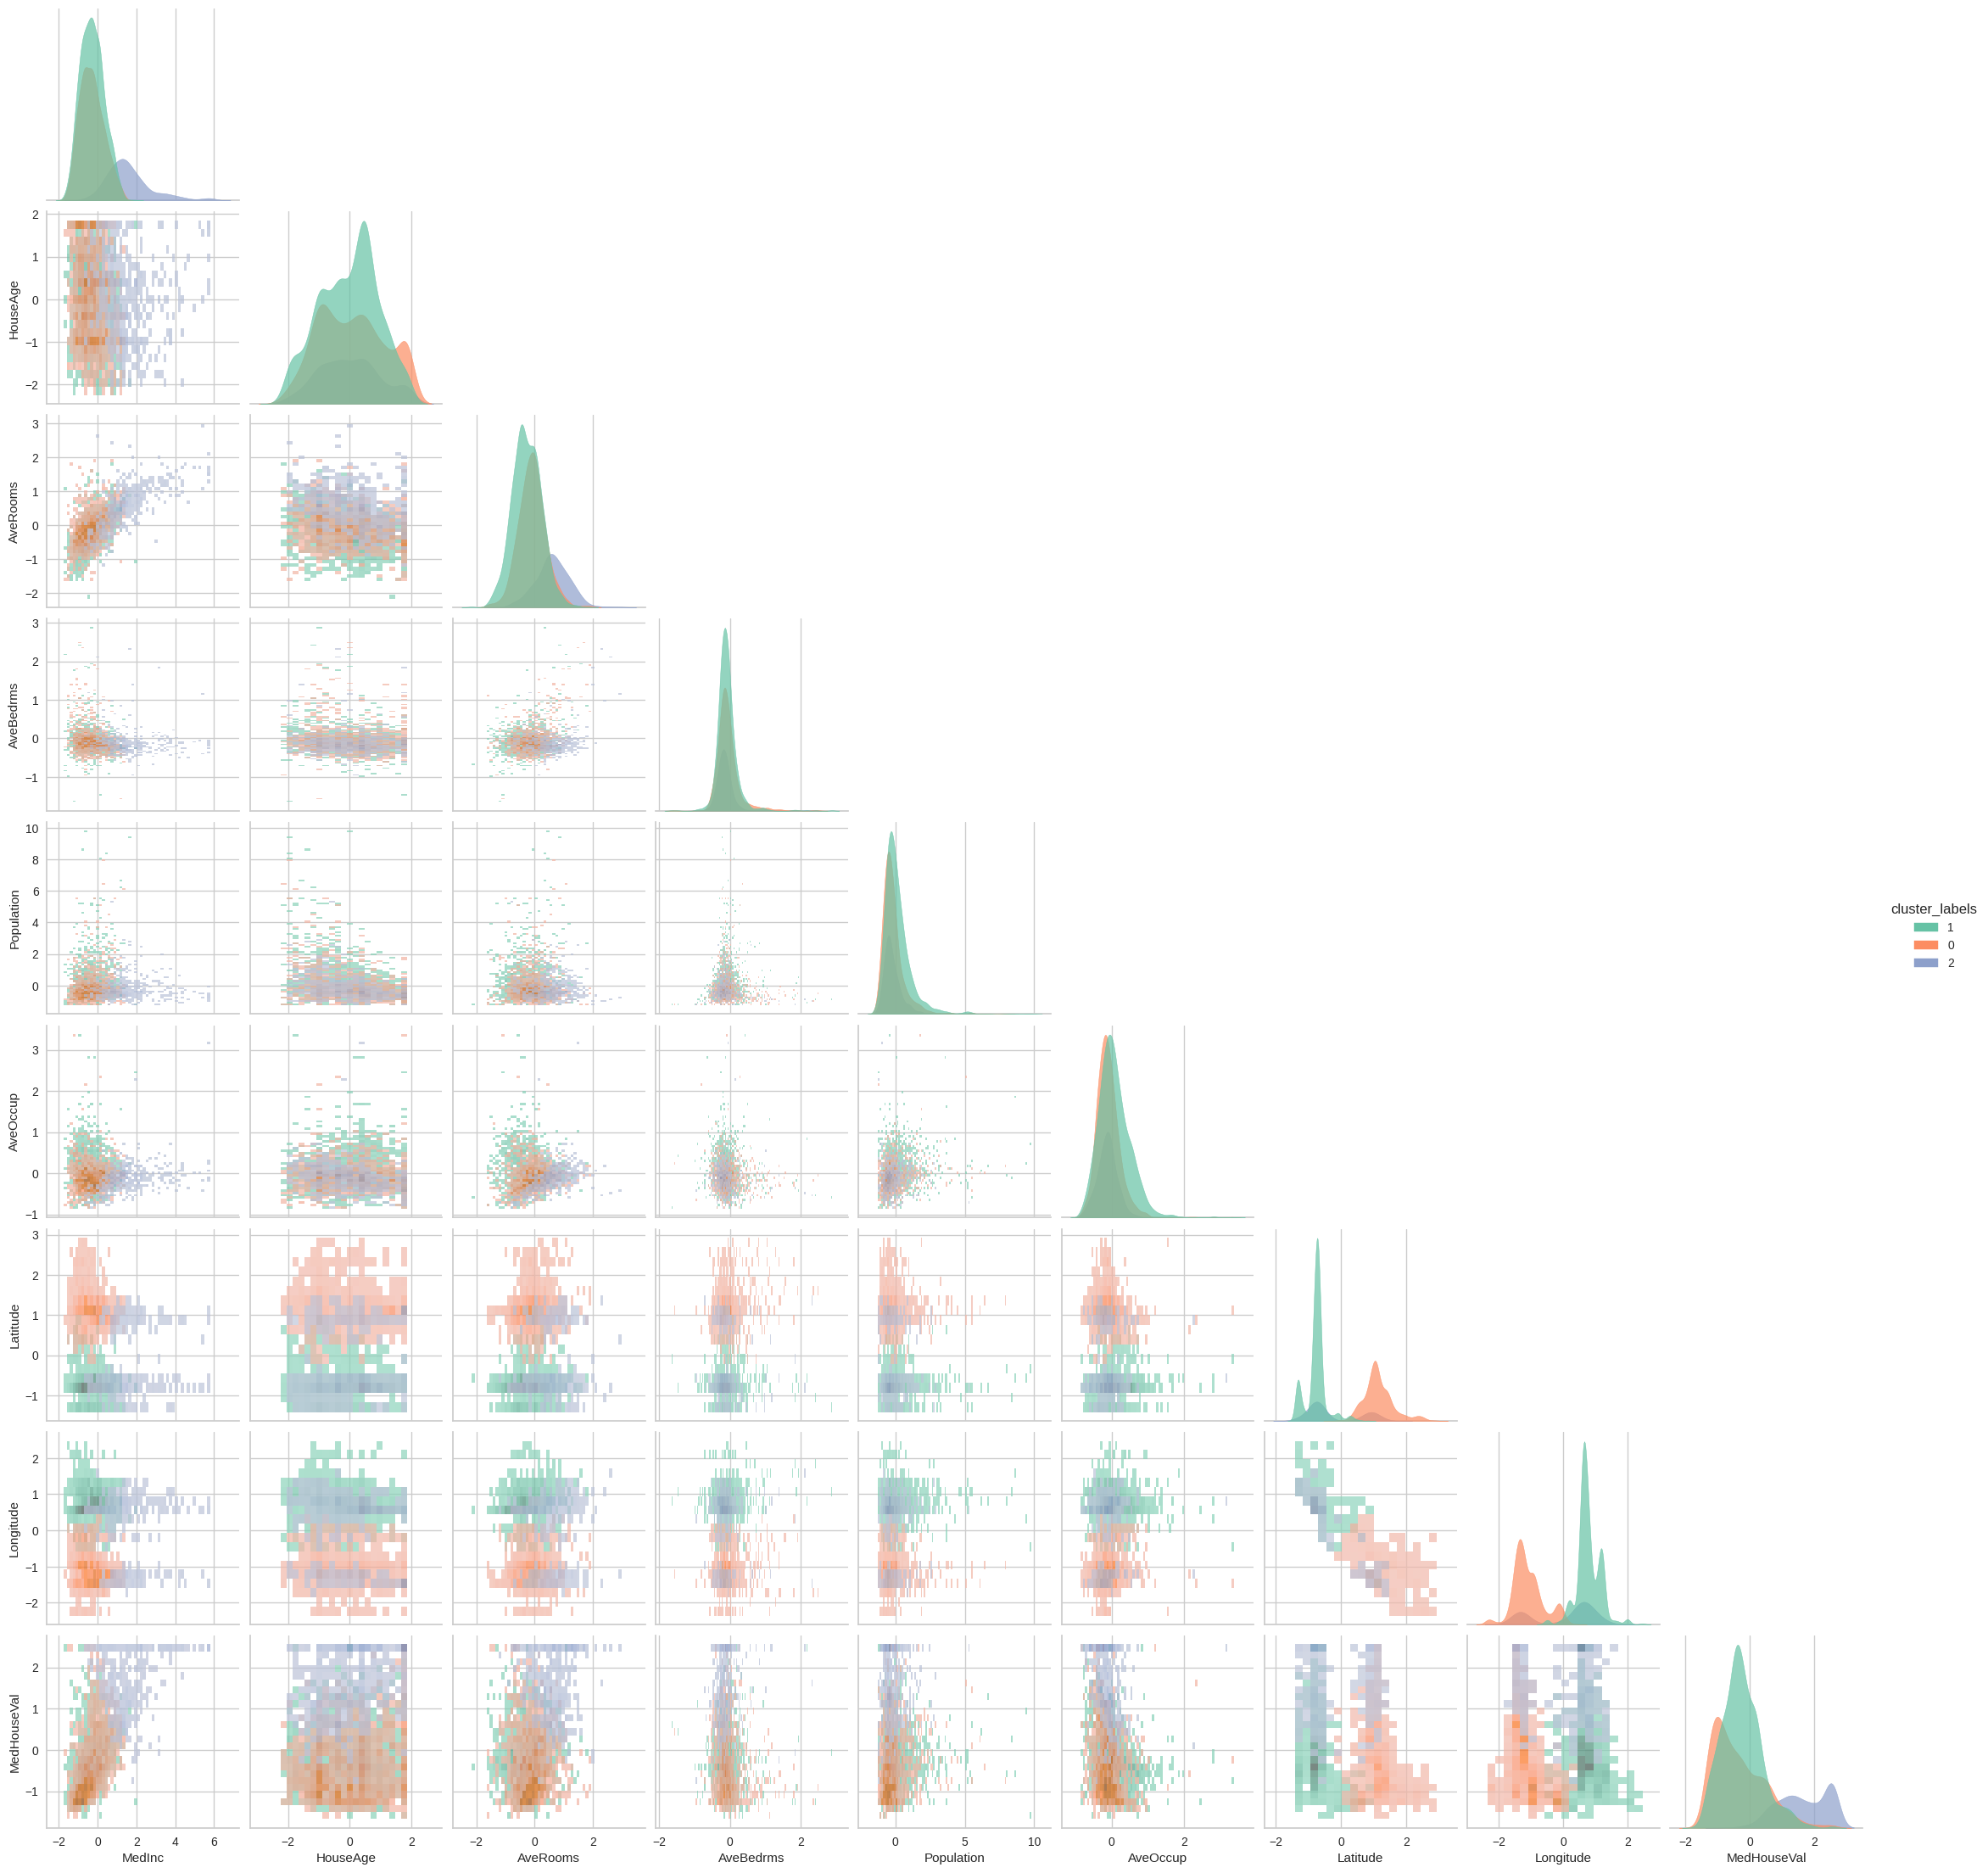

In [ ]:
sns.pairplot(df_normalized, hue="cluster_labels",  kind="hist", diag_kind="kde", corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

/tmp/ipython-input-1044110881.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='cluster_labels', ylabel='HouseAge'>

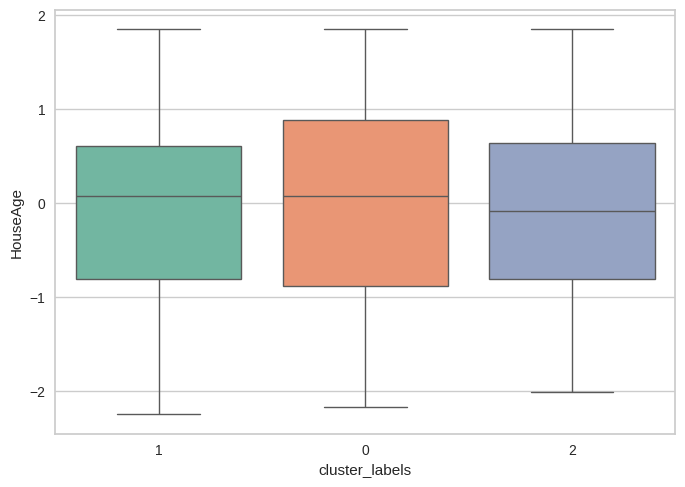

In [ ]:
# Show boxplots of all features per cluster
# sns.boxplot(data=df_normalized, x='cluster_labels', y="Longitude", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="Latitude", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="Population", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="AveOccup", palette="Set2")
sns.boxplot(data=df_normalized, x='cluster_labels', y="HouseAge", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="MedInc", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="MedHouseVal", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="AveBedrms", palette="Set2")
# sns.boxplot(data=df_normalized, x='cluster_labels', y="AveRooms", palette="Set2")

##Question:

1. You want to send out e-newsletters with slightly more emphasis on housing types (e.g., Single Family, Townhouse, and apartments/condos) and age, without totally neglecting the other factors. How do you reflect that in your clustering approach?